# Question_1_Analysis_2

#Find out the peak time for most of the mails sent by chairman Ken Lay

In [1]:
#importing libraries
import os
import glob
import re
import email
import operator
import csv
import matplotlib.pyplot as plt
from validate_email import validate_email
from nltk.corpus import stopwords
from email.parser import Parser

#Getting path of the files to be processed
path = glob.glob(r'C:\Users\Shephali Mahajan\Desktop\Python_Midterm\Enron_Data\Enron_Dataset\maildir\lay-k*')

In [2]:
#calculating the frequency of mail sent times
for folder_list in path:               #fetching all folders in the path
    all_folders = glob.glob(os.path.join(folder_list, '*sent*'))
    for all_sent_folders in all_folders:  #fetching only sent folders
        all_mails = glob.glob(os.path.join(all_sent_folders, '*'))
        email_timestamp = []
        t = []
        time = []
        time_dict = {}
        
#     the below for loop will traverse through each email and get the time when the mail was sent
        for x in all_mails:
            if x[-1].isdigit():
                with open(x) as data_file:
                    raw_file = data_file.read()
                    email = Parser().parsestr(raw_file)
                    email_timestamp.append(email.get('date'))
                    for email_time in email_timestamp:
                        if email_time:
                            email_time=email_time.split(" ")
                            for time_1 in email_time[4:5]:
                                time_1=time_1.split(":")
                                t.append(time_1)
                                for t1 in time_1[0:1]:
                                    #print(time_1)
                                    time.append(t1)

                                    for digit in time:
                                        if digit in time_dict:
                                            time_dict[digit] +=1
                                        else:
                                            time_dict[digit]=1
                                    #print (time_dic)



In [3]:
#sorting the list
sorted_x = sorted(time_dict.items(), key=operator.itemgetter(1), reverse = True)


#Final Output--
print('The time and frequency of the mails sent by chairman Ken Lay are as follows:\n', sorted_x)

The time and frequency of the mails sent by chairman Ken Lay are as follows:
 [('01', 71682744), ('09', 69644978), ('06', 52561605), ('03', 50704774), ('10', 45281132), ('05', 45118175), ('08', 42355501), ('00', 34065561), ('07', 33858930), ('23', 32602256), ('04', 30330902), ('02', 27934143), ('12', 21240017), ('11', 19639287), ('20', 7039076), ('13', 402288), ('15', 53711), ('22', 14256)]


In [4]:
with open('Mail_freq.csv', 'w', newline="") as csvfile:
    csv_output = csv.writer(csvfile)
    csv_output.writerow(['HourOfTheDay', 'Frequency'])
    for row in sorted_x:
        csv_output.writerow([row[0], row[1]])
        csvfile.close

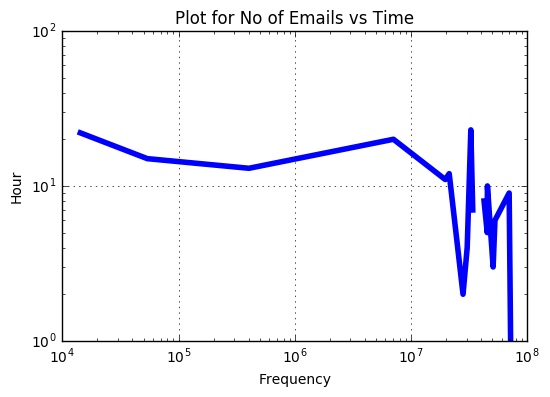

In [5]:
csvfile = open('Mail_freq.csv', 'r')
hour=[]
freq=[]
csv_f=csv.reader(csvfile)
for row in csv_f:
    hour.append(row[0])
    freq.append(row[1])
hour.pop(0)
freq.pop(0)
plt.loglog(freq,hour,color='b',linewidth=4)
plt.grid(True)
plt.title("Plot for No of Emails vs Time")
plt.xlabel("Frequency")
plt.ylabel("Hour")
plt.show()